In [87]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [ ]:
# Set the date range from the current date and the previous  3 years.
start_date = dt.datetime.now() - dt.timedelta(days=365 * 3)
end_date = dt.datetime.now()

#Define a stock  symbol for use
ticker = 'TSLA'

In [ ]:
# Download the data
data = yf.download(ticker, start=start_date, end=end_date)


In [ ]:
Calculate LN retun Y(t)/y(t-1) -1 shift function on 'adjusted close'


In [46]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 918.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [91]:
#os.chdir('C:/Users/admin/Downloads/Time-Series-master/acftest.xlxs')
#

df = pd.read_excel('C:/Users/admin/Downloads/Time-Series-master/acftest.xlsx')
#df = pd.read_csv('C:/Users/admin/Downloads/Time-Series-master/acftest.csv')
#df = pd.read_csv('acftest.csv', delimiter= ';')


In [92]:
df

,Date,daily
0,2020-04-29,0.444060
1,2020-04-30,0.409439
2,2020-05-02,0.443304
3,2020-05-03,0.587130
4,2020-05-04,0.618358
...,...,...
63,2020-07-03,0.477461
64,2020-07-04,0.476743
65,2020-07-05,0.472818
66,2020-07-06,0.471798


In [93]:
#var = pd.read_excel('acftest.xlsx')
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [94]:
# Stationarity test on the original Series using Augmented Dickey-Fuller (ADF) test
augdft= adfuller(df['daily'])

In [95]:
# Second argument below has a value of 0.0936817.. indicating the test failed to reject null hypothesis at 5%
print(augdft[0]) # Test Statistic
print(augdft[1]) # p-value
print(augdft[2])
print(augdft[3])
print(augdft[4])
print(augdft[5])

-2.596697566698239
0.09368173602064739
0
67
{'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}
-369.62876826390766


In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

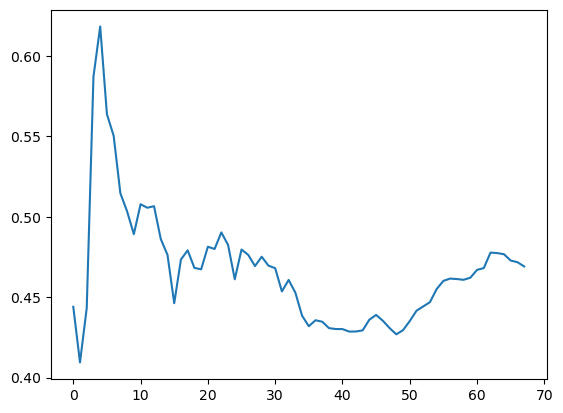

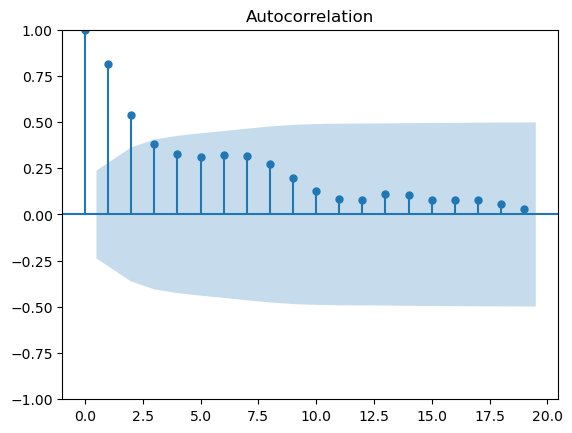

In [58]:
# Original Series plot
plt.plot(df['daily'])

# AutoCorrelation plot on the Original Series
plot_acf(df['daily']);

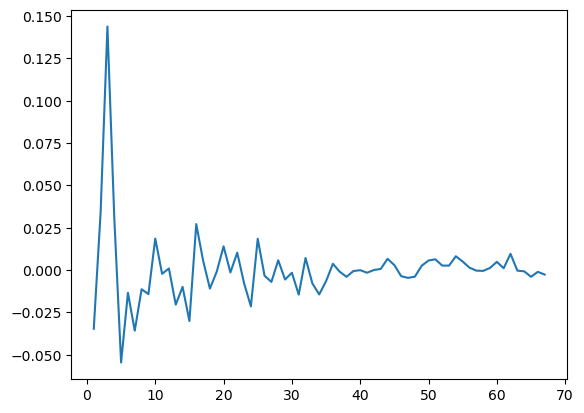

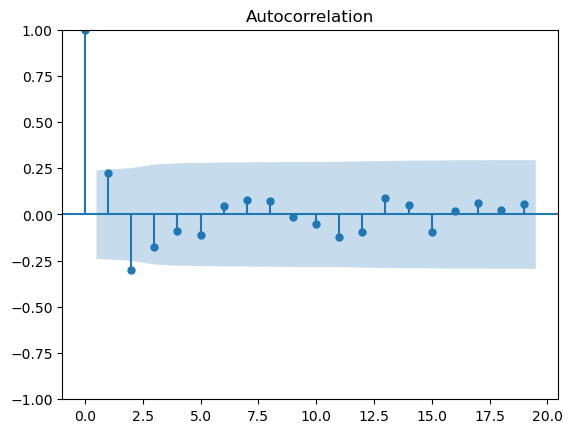

In [97]:
# First Difference plot of the Original Series
plt.plot(df['daily'].diff())

# AutoCorrelation plot on the Difference of Original Series
plot_acf(df['daily'].diff().dropna());

In [98]:
# Stationarity test on the Difference of Original Series
augdft1= adfuller(df['daily'].diff().dropna())

In [99]:
# Second argument of 0.0212284 indicate the test rejecting null hypothesis
# Indicating series satisfies stationarity condition as per ADF test
print(augdft1[0])
print(augdft1[1])
print(augdft1[2])
print(augdft1[3])
print(augdft1[4])
print(augdft1[5])

-3.1790719900118547
0.02122848552759505
11
55
{'1%': -3.5552728880540942, '5%': -2.9157312396694217, '10%': -2.5956695041322315}
-360.1335841475066


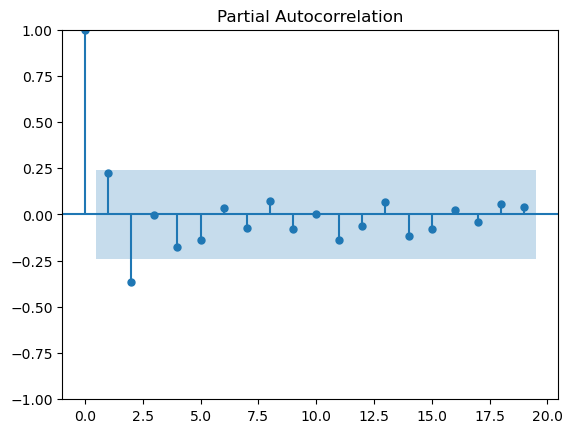

In [100]:
# Determine AR lag in ARIMA by plotting Partial AutoCorrelation
plot_pacf(df['daily'].diff().dropna());

In [66]:
# Determine MA Lag in ARIMA
# Can look at the AutoCorrelation plot to infer

In [101]:
# Fitting the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [102]:
# ARIMA model with AR lag of 2 and first difference. Here MA component is not considered
arimaMod = ARIMA(df['daily'], order=(2,1,0))

In [103]:
arimaModFit = arimaMod.fit()

In [104]:
# p-values for the AR coef below indicates significance
print(arimaModFit.summary())

                               SARIMAX Results                                
Dep. Variable:                  daily   No. Observations:                   68
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 166.586
Date:                Tue, 14 May 2024   AIC                           -327.171
Time:                        18:02:16   BIC                           -320.557
Sample:                             0   HQIC                          -324.554
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3363      0.176      1.909      0.056      -0.009       0.682
ar.L2         -0.4022      0.097     -4.146      0.000      -0.592      -0.212
sigma2         0.0004   4.94e-05      8.153      0.0

In [105]:
# residual plots
rsd = pd.DataFrame(arimaModFit.resid)

<Axes: title={'center': 'Residuals'}>

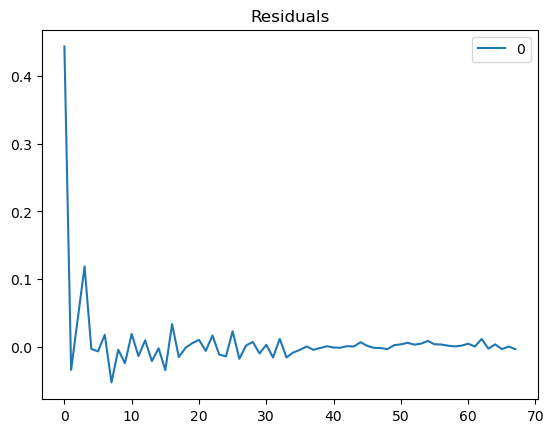

In [106]:
rsd.plot(title="Residuals")

<Axes: title={'center': 'Density'}, ylabel='Density'>

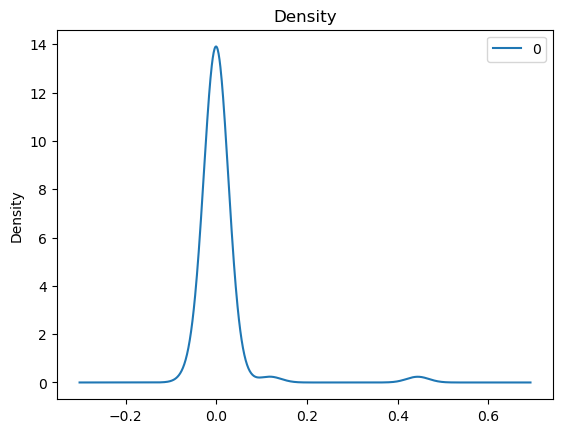

In [107]:
# Plotting the Kernel Density Estimation --> A Non-parametric estimate of the Gaussian PDF
rsd.plot(kind='kde', title='Density')

In [122]:
predicted = arimaModFit.predict(dynamic=False);
#dynamic=False -> the model uses sample till previous value to predict

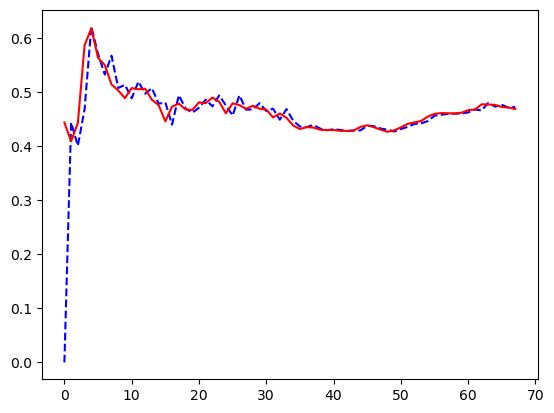

In [126]:
plt.plot( predicted.values, label='forecasted', color='blue', linestyle='--')
plt.plot(df['daily'].values, label='actual', color='red', linestyle='-')
plt.show()

In [127]:
#Forecasting with training and testing sets
X = pd.DataFrame(df['daily'])

In [128]:
X.size

68

In [129]:
k = 0.8*X.size
k

54.400000000000006

In [130]:
# Thumb rule of 80:20 for training and testing. Can experiment cross-validation using different date range buckets
traindata = X[0:54]
testdata = X[54:]

In [131]:
print(traindata.size)
print(testdata.size)

54
14


In [133]:
arimaMod1 = ARIMA(traindata, order=(2,1,0))
arimaModFit1 = arimaMod1.fit()

In [135]:
arimaPrediction = arimaModFit.forecast(14,alpha=0.05) #95% confidence
print(arimaPrediction[0]) #predicted
print(arimaPrediction[1]) #SE
print(arimaPrediction[2]) #Confidence Interval

KeyError: 1

In [136]:
arimaPrediction

68    0.468676
69    0.469578
70    0.470074
71    0.469878
72    0.469613
73    0.469602
74    0.469705
75    0.469744
76    0.469716
77    0.469691
78    0.469694
79    0.469705
80    0.469707
81    0.469704
Name: predicted_mean, dtype: float64

In [137]:
fSeries = pd.Series(arimaPrediction[0], index=testdata.index)
ls = pd.Series(arimaPrediction[2][:, 0], index=testdata.index)
us = pd.Series(arimaPrediction[2][:, 1], index=testdata.index)

#plot
plt.plot(traindata, label='training')
plt.plot(testdata, label='actual')
plt.plot(fSeries, label='forecast')
plt.fill_between(ls.index, ls, us, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

KeyError: 0